### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [54]:
data = pd.read_csv('data/coupons.csv')

In [55]:
data.head(100)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,1~3,less1,1~3,1,1,0,0,1,1
96,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,1
97,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Male,21,Single,...,less1,1~3,less1,1~3,1,1,0,0,1,1
98,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,1


In [56]:
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


2. Investigate the dataset for missing or problematic data.

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

The majority of columns have a minimal number of null values, with the maximum number of observations reaching 12,684. Twenty columns have complete observations. Excluding the "Car" column, which has 108 missing values; the column with the fewest observations is "CoffeHouse," yet it still retains over 98% of its values.

3. Decide what to do about your missing data -- drop, replace, other...

The missing data will be excluded from each specific analysis when required. It should be noted that the "Car" column contains a substantial amount of missing data, but these records will not be removed unless deemed necessary for the analysis at hand. In conclusion null values will be removed as needed.

4. What proportion of the total observations chose to accept the coupon? 



In [58]:
# to calculate the proportion of the total observation, count the accepted divided by the total observations
total_observations = len(data)
accepted_coupons = len(data[data['Y'] == 1])
proportion_accepted = accepted_coupons / total_observations
print('Total Observations =', total_observations)
print('Total Accepted Coupon = ', accepted_coupons)
print('proportion of accepted coupons = ', proportion_accepted)

Total Observations = 12684
Total Accepted Coupon =  7210
proportion of accepted coupons =  0.5684326710816777


To determine the proportion of accepted coupons, all 12,684 observations were considered. The calculation specifically utilizes the "coupon" and "Y" columns, which have an equal number of observations. The overall proportion of accepted coupons, irrespective of the coupon type, is calculated to be 0.568 or 56.8%.

5. Use a bar plot to visualize the `coupon` column.

In [203]:
# The bar plot for the coupon column
fig5a=px.bar(data, x="coupon")
fig5a.update_layout(title="Bar Chart observations by coupon")
fig5a.show()

According to the bar chart, the coffee house category had the highest number of delivered coupons, whereas the lowest number of coupons was observed in the Restaurant (20-50) category. 

In [201]:
# Barchart of accepted coupon by coupon type
fig5b = px.bar(data.query('Y == 1'), x="coupon")
fig5b.update_layout(title="Bar Chart accepted coupon frequency by coupon")
fig5b.show()

The bar chart illustrates the acceptance of coupons. From the visualization, it is evident that Restaurant (<20) has a substantial number of accepted coupons in comparison to the quantity of coupons delivered for that specific category. This suggests a higher proportion of acceptance for Restaurant (<20) coupons.

6. Use a histogram to visualize the temperature column.

In [51]:
# identify the unique values for temperature column
data['temperature'].unique()

array([55, 80, 30], dtype=int64)

In [197]:
# Tempreature histogram
fig6= px.histogram(data, x= 'temperature')
fig6.update_layout(title="Histogram for Temperature")
fig6.show()

Figure 6 reveals intriguing findings, notably the absence of values within the range of 60 to 80 degrees. This suggests that the data collection process may have omitted certain months, as it is highly unusual to have no data points between 60 and 80 degrees out of a total of 12,684 observations. Moreover, the temperature data does not exhibit a continuous pattern but rather appears to be discrete, with only three distinct values. This observation raises concerns about the instrument used for temperature collection, indicating potential issues with its accuracy or reliability.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [36]:
# List the coupon categories 
data['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

In [37]:
# New dataframe for the analysis only considering Bar coupons
data2 = data[data['coupon'] == "Bar"]
data2

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


A total of 2017 observations correspond to Bar coupons.

2. What proportion of bar coupons were accepted?


In [38]:
# calculate accepted Bar coupon
total_coupons_bar = len(data2)
accepted_coupons_bar = len(data2[data2['Y'] == 1])
proportion_accepted_coupons_bar = accepted_coupons_bar / total_coupons_bar
print('total_coupons_bar =', total_coupons_bar)
print('accepted_coupons_bar =', accepted_coupons_bar)
print('proportion_accepted_coupons_bar =' ,proportion_accepted_coupons_bar)

total_coupons_bar = 2017
accepted_coupons_bar = 827
proportion_accepted_coupons_bar = 0.41001487357461575


In [ ]:
Proportion of 0.410 or 41% of Bar coupon are accepted. This results aligned with the fig5c.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [43]:
# identify data column name
column_names = data.columns.tolist()
print(column_names)

['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y']


In [44]:
# identify the unique values for Bar column
data2['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', nan, '4~8'], dtype=object)

In [40]:
#Dataframe for Bar contains null values, this step is to remove null values
data3 = data2.dropna(subset=['Bar'])
data3
#data3 contains the dataframe for the analysis

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [198]:
# Bar plot showing the coupon acceptance total by visit times
figII3a = px.bar(data3.query('Y == 1'), x="Bar")
figII3a.update_layout(title="Bar Chart Accepted coupon bar visits")
figII3a.show()

Based on the findings presented in Figure II3a, individuals who visit a bar three times or less accepted a greater quantity of coupons in comparison to those who visit a bar more than three times. Furthermore, the data reveals that individuals who never visit a bar accepted more than 150 bar coupons.

In [45]:
# new dataframe containing the observation where the bar is visited 3 or fewer times
data4 = data3.query('Bar == "never" or Bar == "less1" or Bar == "1~3"')
data4

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [46]:
# new dataframe containing the observation where the bar is visited more than 3 times
data5 = data3.query('Bar == "gt8" or Bar == "4~8"')
data5

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
156,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,0,0,0,1,1
167,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,0,0,1,0,1
171,Work,Alone,Sunny,55,7AM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,1,1,0,1,1
454,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,31,Single,...,gt8,gt8,gt8,gt8,1,0,0,0,1,0
465,Home,Alone,Sunny,55,6PM,Bar,1d,Male,31,Single,...,gt8,gt8,gt8,gt8,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12198,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Female,26,Unmarried partner,...,gt8,1~3,1~3,1~3,1,1,0,0,1,1
12199,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Female,26,Unmarried partner,...,gt8,1~3,1~3,1~3,1,1,0,0,1,1
12202,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Female,26,Unmarried partner,...,gt8,1~3,1~3,1~3,1,1,0,0,1,1
12207,Home,Partner,Sunny,30,10PM,Bar,2h,Female,26,Unmarried partner,...,gt8,1~3,1~3,1~3,1,1,1,0,1,1


In [50]:
# calculate the proportion of acceptance for those with 3 or less visit to the bar
total_observations_bar_3_or_fewer = len(data4)
accepted_observations_bar_3_or_fewer = len(data4[data4['Y'] == 1])
proportion_accepted_bar_3_or_fewer = accepted_observations_bar_3_or_fewer / total_observations_bar_3_or_fewer
total_observations_bar_mt_3 = len(data5)
accepted_observations_bar_mt_3 = len(data5[data5['Y'] == 1])
proportion_accepted_bar_mt_3 = accepted_observations_bar_mt_3 / total_observations_bar_mt_3
print('accepted visit bar 3 or fewer =', accepted_observations_bar_3_or_fewer)
print('proportion accepted visit bar 3 or fewer =', proportion_accepted_bar_3_or_fewer)
print('accepted visit bar more than 3 =', accepted_observations_bar_mt_3)
print('proportion accepted visit bar more than 3 =',proportion_accepted_bar_mt_3)

accepted visit bar 3 or fewer = 666
proportion accepted visit bar 3 or fewer = 0.37061769616026713
accepted visit bar more than 3 = 153
proportion accepted visit bar more than 3 = 0.7688442211055276


A considerable number of participants who visit the bar more than three times exhibit a noticeably higher acceptance rate compared to those who visit three times or less. However, the total number of observations for individuals visiting the bar more than three times is significantly smaller than those who visit three times or less. It is reasonable to expect that individuals who visit a place more frequently are more likely to accept a coupon, as they are more likely to utilize it compared to those who visit the bar less frequently.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [199]:
# Barchart of accepted coupon by age
figII4a = px.bar(data6.query('Y == 1'), x="age")
figII4a.update_layout(title="Bar Chart accepted coupon Participant age vising bar 1 or more time")
figII4a.show()

Figure II4a shows age 21 as the age with the higher coupon acceptance, follow by age 26 and age 31

In [61]:
# identify the values for age colum
data['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [62]:
# convert the all values of age column to quantitative values as some values are qualitative as expressed.
data3A = data3.reset_index()
Age_attribute = ['below21', '21', '26', '31', '36', '41', '46', '50plus' ]
def Age_Att_int(x):
    return Age_attribute.index(x)

data3A['Age_Index'] = data3A['age'].apply(Age_Att_int)
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [63]:
# Problem with the bar data and the question, is that bar data does not have a more than 
# value but Bar visit 1~3. For the purpose of this exercise values 1~3 are considered more than 1. 
data6 = data3A.query('Bar == "1~3" or  Bar == "gt8" or Bar == "4~8"')
#now adding an additional filter for observation of people with age more than 25
data7 = data6.query('Age_Index > 1')
data7

,index,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Age_Index
15,112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,...,4~8,1~3,less1,1,0,0,0,1,1,2
16,123,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,...,4~8,1~3,less1,1,0,0,1,0,1,2
17,127,Work,Alone,Sunny,55,7AM,Bar,1d,Male,26,...,4~8,1~3,less1,1,1,1,0,1,1,2
21,156,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,...,gt8,gt8,gt8,1,0,0,0,1,1,2
22,167,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,...,gt8,gt8,gt8,1,0,0,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951,12481,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Female,26,...,4~8,4~8,less1,1,1,0,0,1,1,2
1952,12482,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Female,26,...,4~8,4~8,less1,1,1,0,0,1,1,2
1953,12485,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Female,26,...,4~8,4~8,less1,1,1,0,0,1,1,2
1954,12488,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Female,26,...,4~8,4~8,less1,1,1,0,0,1,1,2


In [64]:
#now adding an additional filter for observation of people with age less than 25
data8 = data6.query('Age_Index < 2')
data8

,index,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Age_Index
12,90,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,...,1~3,less1,1~3,1,0,0,0,1,1,1
13,101,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,...,1~3,less1,1~3,1,0,0,1,0,1,1
14,105,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,...,1~3,less1,1~3,1,1,1,0,1,0,1
29,224,No Urgent Place,Partner,Sunny,80,10AM,Bar,2h,Female,21,...,1~3,1~3,1~3,1,0,0,0,1,0,1
30,227,No Urgent Place,Partner,Sunny,80,6PM,Bar,1d,Female,21,...,1~3,1~3,1~3,1,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1854,12040,Work,Alone,Snowy,30,7AM,Bar,1d,Male,21,...,less1,less1,less1,1,1,1,0,1,1,1
1961,12525,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,21,...,gt8,4~8,1~3,1,1,0,0,1,1,1
1962,12526,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,21,...,gt8,4~8,1~3,1,1,0,0,1,1,1
1963,12529,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,21,...,gt8,4~8,1~3,1,1,0,0,1,0,1


In [66]:
#calculate the proportion of observation with accepted the coupon more than 25 years old and visting the bar more than 1 time.
total_observations_bar_mt_1_mt25 = len(data7)
accepted_coupon_bar_mt_1_mt25 = len(data7[data7['Y'] == 1])
proportion_accepted_bar_mt_1_mt25 = accepted_coupon_bar_mt_1_mt25 / total_observations_bar_mt_1_mt25
print('Total observation age more than 25 years old and visiting bar more than 1 time =', total_observations_bar_mt_1_mt25)
print('Accepted coupon more than 25 years old visiting bar more than 1 time =', accepted_coupon_bar_mt_1_mt25)
print('proportion accepted_coupon more than 25 years old visiting bar more than 1 time =',proportion_accepted_bar_mt_1_mt25)

total_observations_bar_mt_1_lt25 = len(data8)
accepted_observations_bar_mt_1_lt25 = len(data8[data8['Y'] == 1])
proportion_accepted_bar_mt_1_lt25 = accepted_observations_bar_mt_1_lt25 / total_observations_bar_mt_1_lt25
print('Total observation age less than 25 years old and visiting bar more than 1 time =', total_observations_bar_mt_1_lt25)
print('Accepted coupon more less 25 years old visting bar more than 1 time =', accepted_observations_bar_mt_1_lt25)
print('proportion accepted_coupon less than 25 years old visiting bar more than 1 time =',proportion_accepted_bar_mt_1_lt25)

Total observation age more than 25 years old and visiting bar more than 1 time = 420
Accepted coupon more than 25 years old visiting bar more than 1 time = 292
proportion accepted_coupon more than 25 years old visiting bar more than 1 time = 0.6952380952380952
Total observation age less than 25 years old and visiting bar more than 1 time = 176
Accepted coupon more less 25 years old visting bar more than 1 time = 118
proportion accepted_coupon less than 25 years old visiting bar more than 1 time = 0.6704545454545454


here is no notable distinction between the groups that accept the coupon based on their frequency of visiting the bar, whether they visit more than once a month or whether they are above or below the age of 25.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [98]:
#identified the passanger values
data['passanger'].unique()

array(['Alone', 'Friend(s)', 'Kid(s)', 'Partner'], dtype=object)

In [194]:
#passanger within the visit more than 1 time a bar observations
figII5a = px.bar(data6.query('Y == 1'), x="passanger")
figII6a.update_layout(title="Bar Chart Participant passanger vising bar 1 or more time")
figII5a.show()

In [70]:
# removing the passanger with kids from the analysis
data9 = data6.query('passanger != "Kid(s)"')
data9

,index,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Age_Index
12,90,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,...,1~3,less1,1~3,1,0,0,0,1,1,1
13,101,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,...,1~3,less1,1~3,1,0,0,1,0,1,1
14,105,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,...,1~3,less1,1~3,1,1,1,0,1,0,1
15,112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,...,4~8,1~3,less1,1,0,0,0,1,1,2
16,123,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,...,4~8,1~3,less1,1,0,0,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1955,12500,Work,Alone,Snowy,30,7AM,Bar,1d,Female,26,...,4~8,4~8,less1,1,1,1,0,1,0,2
1961,12525,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,21,...,gt8,4~8,1~3,1,1,0,0,1,1,1
1962,12526,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,21,...,gt8,4~8,1~3,1,1,0,0,1,1,1
1963,12529,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,21,...,gt8,4~8,1~3,1,1,0,0,1,0,1


In [75]:
# identifying data ocupation values
data9['occupation'].unique()

array(['Student', 'Healthcare Support', 'Management', 'Unemployed',
       'Sales & Related', 'Office & Administrative Support',
       'Construction & Extraction', 'Legal',
       'Life Physical Social Science', 'Retired',
       'Computer & Mathematical', 'Healthcare Practitioners & Technical',
       'Personal Care & Service', 'Architecture & Engineering',
       'Arts Design Entertainment Sports & Media', 'Protective Service',
       'Business & Financial', 'Food Preparation & Serving Related',
       'Installation Maintenance & Repair', 'Education&Training&Library',
       'Community & Social Services', 'Production Occupations',
       'Transportation & Material Moving',
       'Building & Grounds Cleaning & Maintenance'], dtype=object)

In [192]:
#occupations within the visit more than 1 time a bar observations
figII5b = px.bar(data6, x="occupation")
figII5b.update_layout(title="Bar Chart Participant Occupation vising bar 1 or more time")
figII5b.show()

Based on figure II 5b,it is unnecessary to exclude the occupation category of farming, fishing, and forestry since this occupation is not represented among individuals who visit a bar more than once

In [82]:
# calculate the proportion of accepting the coupon with no kids
total_observations_bar_mt_1_notkids_notfarfishfore = len(data9)
accepted_observations_bar_mt_1_notkids_notfarfishfore = len(data9[data9['Y'] == 1])
proportion_accepted_bar_mt_1_mt_1_notkids_notfarfishfore = accepted_observations_bar_mt_1_notkids_notfarfishfore / total_observations_bar_mt_1_notkids_notfarfishfore
print('total observation visit bar more than 1 time, no kids = ', total_observations_bar_mt_1_notkids_notfarfishfore)
print('accepted coupon visit bar more than 1 time, no kids  =' ,accepted_observations_bar_mt_1_notkids_notfarfishfore)
print('proportionaccepted coupon visit bar more than 1 time, no kids =',proportion_accepted_bar_mt_1_mt_1_notkids_notfarfishfore )

total observation visit bar more than 1 time, no kids =  551
accepted coupon visit bar more than 1 time, no kids  = 393
proportionaccepted coupon visit bar more than 1 time, no kids = 0.7132486388384754


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [143]:
# identify the marital status
data['maritalStatus'].unique()

array(['Unmarried partner', 'Single', 'Married partner', 'Divorced',
       'Widowed'], dtype=object)

In [191]:
figII6a = px.bar(data6, x="maritalStatus")
figII6a.update_layout(title="Bar Chart Participant Marital Status vising bar 1 or more time")
figII6a.show()

Based on figure II 6a,it is unnecessary to exclude the widowed observations since this marital status is not represented among individuals who visit a bar more than once.

In [80]:
data6['maritalStatus'].unique()

array(['Single', 'Unmarried partner', 'Married partner', 'Divorced'],
      dtype=object)

In [84]:
#calculate proportion of visiting bar more than 1 no kids resutls same than exercise 5
total_observations_bar_mt_1_notkids_notwidow = len(data9)
accepted_observations_bar_mt_1_notkids_notwidow = len(data9[data9['Y'] == 1])
proportion_accepted_bar_mt_1_mt_1_notkids_notwidow = accepted_observations_bar_mt_1_notkids_notwidow / total_observations_bar_mt_1_notkids_notwidow
print('total_observations_visit bar more than 1 with no kids is not widowed = ' ,total_observations_bar_mt_1_notkids_notwidow)
print('accepted coupon visit bar more than 1 with no kids is not widowed=',accepted_observations_bar_mt_1_notkids_notwidow)
print('proportion_accepted coupon visit bar more than 1 with no kids is not widowed=',proportion_accepted_bar_mt_1_mt_1_notkids_notwidow )

total_observations_visit bar more than 1 with no kids is not widowed =  551
accepted coupon visit bar more than 1 with no kids is not widowed= 393
proportion_accepted coupon visit bar more than 1 with no kids is not widowed= 0.7132486388384754


Since there are no observations of individuals who are widowed or with occupation in farming, fishing, and forestry among those who visit a bar more than once, the results of this analysis are identical to those in exercise 5.

go to bars more than once a month and are under the age of 30 OR

In [190]:
# bar chart for visiting bar more than 1 time by age column
figII6b = px.bar(data6, x="age")
figII6b.update_layout(title="Bar Chart Participant Age vising bar 1 or more time")
figII6b.show()

Based on figure II 6b,there are individuals below 30 who visit a bar more than once.

In [87]:
#filtering the data by age under 30 from the index previously assigned
data12 = data6.query('Age_Index < 3')

In [88]:
# calculating the proportion of accepted the coupon people who visit bar more than 1 time and less than 30 year old
total_observations_bar_mt_1_notkids_lt30 = len(data12)
accepted_observations_bar_mt_1_notkids_lt30 = len(data12[data12['Y'] == 1])
proportion_accepted_bar_mt_1_mt_1_notkids_lt30 = accepted_observations_bar_mt_1_notkids_lt30 / total_observations_bar_mt_1_notkids_lt30
print('total_observations_visiting bar_more than 1 , no kids and less than 30 years old=' ,total_observations_bar_mt_1_notkids_lt30)
print('accepted coupon visiting bar_more than 1 , no kids and less than 30 years old=' ,accepted_observations_bar_mt_1_notkids_lt30)
print('proportion accepted coupon visiting bar_more than 1 , no kids and less than 30 years old =',proportion_accepted_bar_mt_1_mt_1_notkids_lt30)

total_observations_visiting bar_more than 1 , no kids and less than 30 years old= 345
accepted coupon visiting bar_more than 1 , no kids and less than 30 years old= 249
proportion accepted coupon visiting bar_more than 1 , no kids and less than 30 years old = 0.7217391304347827


go to cheap restaurants more than 4 times a month and income is less than 50K

In [112]:
#identify the income values
data['income'].unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [113]:
#create an index for income converting data numeric data
data17 = data.reset_index()
income_attribute = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999', '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More']
def income_Att_int(x):
    return income_attribute.index(x)
data17['income_Index'] = data17['income'].apply(income_Att_int)
data17

,index,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,income_Index
0,0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,...,NaN,4~8,1~3,1,0,0,0,1,1,3
1,1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,...,NaN,4~8,1~3,1,0,0,0,1,0,3
2,2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,...,NaN,4~8,1~3,1,1,0,0,1,1,3
3,3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,...,NaN,4~8,1~3,1,1,0,0,1,0,3
4,4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,...,NaN,4~8,1~3,1,1,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,...,1~3,4~8,1~3,1,0,0,1,0,1,6
12680,12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,...,1~3,4~8,1~3,1,0,0,0,1,1,6
12681,12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,...,1~3,4~8,1~3,1,0,0,1,0,0,6
12682,12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,...,1~3,4~8,1~3,1,1,1,0,1,0,6


In [114]:
#filtering the coupon data only for restaurant <20
data18 = data17[data17['coupon'] == "Restaurant(<20)"]
data18

,index,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,income_Index
0,0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,...,NaN,4~8,1~3,1,0,0,0,1,1,3
5,5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,...,NaN,4~8,1~3,1,1,0,0,1,1,3
7,7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,...,NaN,4~8,1~3,1,1,0,0,1,1,3
10,10,No Urgent Place,Kid(s),Sunny,80,2PM,Restaurant(<20),1d,Female,21,...,NaN,4~8,1~3,1,0,0,0,1,1,3
11,11,No Urgent Place,Kid(s),Sunny,55,2PM,Restaurant(<20),1d,Female,21,...,NaN,4~8,1~3,1,1,0,0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12666,12666,No Urgent Place,Friend(s),Snowy,30,2PM,Restaurant(<20),1d,Male,26,...,1~3,4~8,1~3,1,0,0,0,1,1,6
12668,12668,No Urgent Place,Alone,Sunny,80,10AM,Restaurant(<20),2h,Male,26,...,1~3,4~8,1~3,1,0,0,0,1,1,6
12671,12671,No Urgent Place,Partner,Snowy,30,10AM,Restaurant(<20),1d,Male,26,...,1~3,4~8,1~3,1,0,0,0,1,1,6
12677,12677,Home,Partner,Sunny,30,6PM,Restaurant(<20),1d,Male,26,...,1~3,4~8,1~3,1,1,1,0,1,1,6


In [115]:
# identify the restauranlessthan29 values
data['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', nan, 'never'], dtype=object)

In [116]:
#removing the null values from the dataframe
data19 = data18.dropna(subset=['RestaurantLessThan20'])
data19

,index,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,income_Index
0,0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,...,NaN,4~8,1~3,1,0,0,0,1,1,3
5,5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,...,NaN,4~8,1~3,1,1,0,0,1,1,3
7,7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,...,NaN,4~8,1~3,1,1,0,0,1,1,3
10,10,No Urgent Place,Kid(s),Sunny,80,2PM,Restaurant(<20),1d,Female,21,...,NaN,4~8,1~3,1,0,0,0,1,1,3
11,11,No Urgent Place,Kid(s),Sunny,55,2PM,Restaurant(<20),1d,Female,21,...,NaN,4~8,1~3,1,1,0,0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12666,12666,No Urgent Place,Friend(s),Snowy,30,2PM,Restaurant(<20),1d,Male,26,...,1~3,4~8,1~3,1,0,0,0,1,1,6
12668,12668,No Urgent Place,Alone,Sunny,80,10AM,Restaurant(<20),2h,Male,26,...,1~3,4~8,1~3,1,0,0,0,1,1,6
12671,12671,No Urgent Place,Partner,Snowy,30,10AM,Restaurant(<20),1d,Male,26,...,1~3,4~8,1~3,1,0,0,0,1,1,6
12677,12677,Home,Partner,Sunny,30,6PM,Restaurant(<20),1d,Male,26,...,1~3,4~8,1~3,1,1,1,0,1,1,6


In [117]:
#confirming income less than 50k is in the new dataframe
figII6c = px.bar(data19, x="income")
figII6c.show()

In [ ]:
Based on figure II 6c,there are individuals with income less than 50K who visit a restaurant < 20.

In [118]:
#create an index for restaurant visit converting data numeric data
data19b = data19.reset_index()
RestaurantLessThan20_attribute = ['never', 'less1', '1~3', '4~8', 'gt8']
def RestaurantLessThan20_Att_int(x):
    return RestaurantLessThan20_attribute.index(x)
data19b['RestaurantLessThan20_Index'] = data19b['RestaurantLessThan20'].apply(RestaurantLessThan20_Att_int)
data19b

,level_0,index,destination,passanger,weather,temperature,time,coupon,expiration,gender,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,income_Index,RestaurantLessThan20_Index
0,0,0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,...,4~8,1~3,1,0,0,0,1,1,3,3
1,5,5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,...,4~8,1~3,1,1,0,0,1,1,3,3
2,7,7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,...,4~8,1~3,1,1,0,0,1,1,3,3
3,10,10,No Urgent Place,Kid(s),Sunny,80,2PM,Restaurant(<20),1d,Female,...,4~8,1~3,1,0,0,0,1,1,3,3
4,11,11,No Urgent Place,Kid(s),Sunny,55,2PM,Restaurant(<20),1d,Female,...,4~8,1~3,1,1,0,0,1,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2754,12666,12666,No Urgent Place,Friend(s),Snowy,30,2PM,Restaurant(<20),1d,Male,...,4~8,1~3,1,0,0,0,1,1,6,3
2755,12668,12668,No Urgent Place,Alone,Sunny,80,10AM,Restaurant(<20),2h,Male,...,4~8,1~3,1,0,0,0,1,1,6,3
2756,12671,12671,No Urgent Place,Partner,Snowy,30,10AM,Restaurant(<20),1d,Male,...,4~8,1~3,1,0,0,0,1,1,6,3
2757,12677,12677,Home,Partner,Sunny,30,6PM,Restaurant(<20),1d,Male,...,4~8,1~3,1,1,1,0,1,1,6,3


In [121]:
#filtering the data per the criteria, income less than 50k a visit more than 4 time, note that the way the data was collected
# is not possible to segregate more than 4 times visit, the 4~8 observations will be included as the more than 4 visit.
data19c = data19b.query('income_Index < 4 and RestaurantLessThan20_Index > 2')
data19c

,level_0,index,destination,passanger,weather,temperature,time,coupon,expiration,gender,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,income_Index,RestaurantLessThan20_Index
0,0,0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,...,4~8,1~3,1,0,0,0,1,1,3,3
1,5,5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,...,4~8,1~3,1,1,0,0,1,1,3,3
2,7,7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,...,4~8,1~3,1,1,0,0,1,1,3,3
3,10,10,No Urgent Place,Kid(s),Sunny,80,2PM,Restaurant(<20),1d,Female,...,4~8,1~3,1,0,0,0,1,1,3,3
4,11,11,No Urgent Place,Kid(s),Sunny,55,2PM,Restaurant(<20),1d,Female,...,4~8,1~3,1,1,0,0,1,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2719,12528,12528,No Urgent Place,Friend(s),Snowy,30,2PM,Restaurant(<20),1d,Male,...,4~8,1~3,1,0,0,0,1,0,1,3
2720,12531,12531,No Urgent Place,Alone,Sunny,80,10AM,Restaurant(<20),2h,Male,...,4~8,1~3,1,0,0,0,1,0,1,3
2721,12532,12532,No Urgent Place,Alone,Snowy,30,10AM,Restaurant(<20),1d,Male,...,4~8,1~3,1,1,0,0,1,0,1,3
2722,12540,12540,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Male,...,4~8,1~3,1,0,0,1,0,0,1,3


In [126]:
# calculate the proportion of individual who visit the cheap restaurant 4 or more times and have income of less than 50k
total_observations_4ormore_cheap_rest_visit_inc_lt50 = len(data19c)
accepted_coupon_4ormore_cheap_rest_visit_inc_lt50 = len(data19c[data19c['Y'] == 1])
proportion_accepted_coupon_4ormore_cheap_rest_visit_inc_lt50 = accepted_coupon_4ormore_cheap_rest_visit_inc_lt50 / total_observations_4ormore_cheap_rest_visit_inc_lt50
print('total observations 4 or more cheap rest visit inc less than 50k=', total_observations_4ormore_cheap_rest_visit_inc_lt50)
print('accepted coupon 4 or more cheap rest visit inc less than 50k=',accepted_coupon_4ormore_cheap_rest_visit_inc_lt50)
print('proportion accepted coupon 4 or more cheap rest visit inc less than 50k =', proportion_accepted_coupon_4ormore_cheap_rest_visit_inc_lt50)

total observations 4 or more cheap rest visit inc less than 50k= 505
accepted coupon 4 or more cheap rest visit inc less than 50k= 359
proportion accepted coupon 4 or more cheap rest visit inc less than 50k = 0.7108910891089109


Individuals who visit Restaurant<20 more than 4 show a 0.71 coupon acceptance or 71%.


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [128]:
#identify the coffeehouse values
data['CoffeeHouse'].unique()

array(['never', 'less1', '4~8', '1~3', 'gt8', nan], dtype=object)

In [131]:
#filtering new dataframe to only coffee house coupon and remove the null values 
dataB = data[data['coupon'] == "Coffee House"]
data20 = dataB.dropna(subset=['CoffeeHouse'])
data20

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [132]:
#confirming passanger for coffee house coupons
figII6c = px.bar(data19, x="passanger")
figII6c.show()

In [133]:
# filtering data for passanger alone proportion calculation
data21 = data20.query('passanger == "Alone"')

In [134]:
# filtering data for passanger partner proportion calculation
data22 = data20.query('passanger == "Partner"')

In [135]:
# filtering data for passanger friend proportion calculation
data23 = data20.query('passanger == "Friend(s)"')

In [138]:
# proportion calculation for Passanger Alone
total_observations_coffee_Pass_Alone = len(data21)
accepted_coupon_coffee_Pass_Alone = len(data21[data21['Y'] == 1])
proportion_accepted_coupon_coffee_Pass_Alone = accepted_coupon_coffee_Pass_Alone/ total_observations_coffee_Pass_Alone
print('Total observations coupon coffee Passanger Alone =', total_observations_coffee_Pass_Alone)
print('accepted coupon coffee Passanger Alone =', accepted_coupon_coffee_Pass_Alone)
print('proportion accepted coupon coffee Passanger Alone =',proportion_accepted_coupon_coffee_Pass_Alone)

Total observations coupon coffee Passanger Alone = 2221
accepted coupon coffee Passanger Alone = 973
proportion accepted coupon coffee Passanger Alone = 0.43809095002251236


In [139]:
# proportion calculation for Passanger partner
total_observations_coffee_Pass_Partner = len(data22)
accepted_coupon_coffee_Pass_Partner = len(data22[data22['Y'] == 1])
proportion_accepted_coupon_coffee_Pass_Partner = accepted_coupon_coffee_Pass_Partner/ total_observations_coffee_Pass_Partner
print('Total observations coupon coffee Passanger Partner =', total_observations_coffee_Pass_Partner)
print('accepted coupon coffee Passanger Partner =', accepted_coupon_coffee_Pass_Partner)
print('proportion accepted coupon coffee Passanger Partner =',proportion_accepted_coupon_coffee_Pass_Partner)

Total observations coupon coffee Passanger Partner = 295
accepted coupon coffee Passanger Partner = 169
proportion accepted coupon coffee Passanger Partner = 0.5728813559322034


In [140]:
# proportion calculation for Passanger friend
total_observations_coffee_Pass_Friend = len(data23)
accepted_coupon_coffee_Pass_Friend = len(data23[data23['Y'] == 1])
proportion_accepted_coupon_coffee_Pass_Friend = accepted_coupon_coffee_Pass_Partner/ total_observations_coffee_Pass_Friend
print('Total observations coupon coffee Passanger Friend =', total_observations_coffee_Pass_Friend)
print('accepted coupon coffee Passanger Friend =', accepted_coupon_coffee_Pass_Friend)
print('proportion accepted coupon coffee Passanger Friend =',proportion_accepted_coupon_coffee_Pass_Friend)

Total observations coupon coffee Passanger Friend = 1205
accepted coupon coffee Passanger Friend = 722
proportion accepted coupon coffee Passanger Friend = 0.14024896265560166


Significant variations are evident in the Coffee House proportion analysis when considering different passenger relationships. Passengers who are partners exhibit the highest proportion of accepted coupons, reaching nearly 60%, whereas passengers who are friends have a considerably lower acceptance rate of only 14%.

Below the statistical analysis using correlation

In [169]:
#income to values for statistical analysis
income_attribute = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999', '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More']
def income_Att_int(x):
    return income_attribute.index(x)
data['income_Index_O'] = data['income'].apply(income_Att_int)
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,income_Index_O
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,0,0,0,1,1,3
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,0,0,0,1,0,3
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,0,0,1,1,3
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,0,0,1,0,3
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,1~3,4~8,1~3,1,0,0,1,0,1,6
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,1~3,4~8,1~3,1,0,0,0,1,1,6
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,1~3,4~8,1~3,1,0,0,1,0,0,6
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,1~3,4~8,1~3,1,1,1,0,1,0,6


In [162]:
# Age to values for statistical analysis
Age_attribute = ['below21', '21', '26', '31', '36', '41', '46', '50plus' ]
def Age_Att_int(x):
    return Age_attribute.index(x)
data['Age_Index_O'] = data['age'].apply(Age_Att_int)
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Passanger_Index,income_Index,Age_Index
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,1~3,1,0,0,0,1,1,0,3,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,1~3,1,0,0,0,1,0,1,3,1
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,1~3,1,1,0,0,1,1,1,3,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,1~3,1,1,0,0,1,0,1,3,1
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,1~3,1,1,0,0,1,0,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,1~3,1,0,0,1,0,1,3,6,2
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,1~3,1,0,0,0,1,1,0,6,2
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,1~3,1,0,0,1,0,0,0,6,2
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,1~3,1,1,1,0,1,0,0,6,2


In [170]:
# Passanger to values for statistical analysis
Passanger_attribute = ['Alone', 'Friend(s)', 'Kid(s)', 'Partner']
def Passanger_Att_int(x):
    return Passanger_attribute.index(x)
data['Passanger_Index_O'] = data['passanger'].apply(Passanger_Att_int)
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,income_Index_O,Passanger_Index_O
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,4~8,1~3,1,0,0,0,1,1,3,0
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,4~8,1~3,1,0,0,0,1,0,3,1
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,4~8,1~3,1,1,0,0,1,1,3,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,4~8,1~3,1,1,0,0,1,0,3,1
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,4~8,1~3,1,1,0,0,1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,4~8,1~3,1,0,0,1,0,1,6,3
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,4~8,1~3,1,0,0,0,1,1,6,0
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,4~8,1~3,1,0,0,1,0,0,6,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,4~8,1~3,1,1,1,0,1,0,6,0


In [171]:
# gender to values for statistical analysis
gender_attribute = ['Female', 'Male']
def gender_Att_int(x):
    return gender_attribute.index(x)
data['gender_Index_O'] = data['gender'].apply(gender_Att_int)
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,income_Index_O,Passanger_Index_O,gender_Index_O
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,1~3,1,0,0,0,1,1,3,0,0
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,1~3,1,0,0,0,1,0,3,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,1~3,1,1,0,0,1,1,3,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,1~3,1,1,0,0,1,0,3,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,1~3,1,1,0,0,1,0,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,1~3,1,0,0,1,0,1,6,3,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,1~3,1,0,0,0,1,1,6,0,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,1~3,1,0,0,1,0,0,6,0,1
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,1~3,1,1,1,0,1,0,6,0,1


In [175]:
#education to values for statistical analysis
education_attribute = ['Some High School', 'High School Graduate', 'Some college - no degree', 'Associates degree', 'Bachelors degree', 'Graduate degree (Masters or Doctorate)']
def education_Att_int(x):
    return education_attribute.index(x)
data['education_Index_O'] = data['education'].apply(education_Att_int)
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,income_Index_O,Passanger_Index_O,gender_Index_O,education_Index_O
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,1,0,0,0,1,1,3,0,0,2
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,1,0,0,0,1,0,3,1,0,2
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,1,1,0,0,1,1,3,1,0,2
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,1,1,0,0,1,0,3,1,0,2
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,1,1,0,0,1,0,3,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,1,0,0,1,0,1,6,3,1,4
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,1,0,0,0,1,1,6,0,1,4
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,1,0,0,1,0,0,6,0,1,4
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,1,1,1,0,1,0,6,0,1,4


In [179]:
# create a new table for statistical analysis
data40 = data[['temperature','has_children','coupon','Y', 'income_Index_O', 'Passanger_Index_O', 'gender_Index_O', 'education_Index_O']]
data40

,temperature,has_children,coupon,Y,income_Index_O,Passanger_Index_O,gender_Index_O,education_Index_O
0,55,1,Restaurant(<20),1,3,0,0,2
1,80,1,Coffee House,0,3,1,0,2
2,80,1,Carry out & Take away,1,3,1,0,2
3,80,1,Coffee House,0,3,1,0,2
4,80,1,Coffee House,0,3,1,0,2
...,...,...,...,...,...,...,...,...
12679,55,0,Carry out & Take away,1,6,3,1,4
12680,55,0,Carry out & Take away,1,6,0,1,4
12681,30,0,Coffee House,0,6,0,1,4
12682,30,0,Bar,0,6,0,1,4


<Axes: title={'center': 'Correlation Heat Map for Bar coupon'}, xlabel='Variables', ylabel='Variables'>

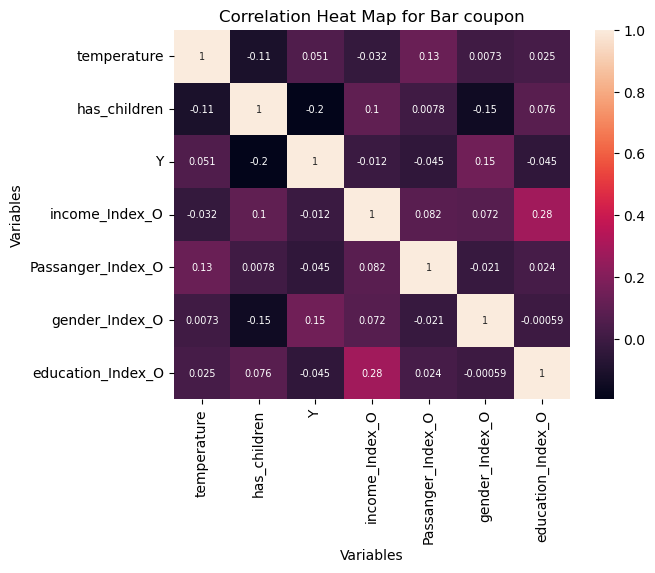

In [204]:
# Statistical correlation for Bar coupon
data41 = data40.query('coupon == "Bar"')
corr_matrix = data41.corr(numeric_only=True)
fig40a = sns.heatmap(corr_matrix, annot=True , annot_kws={"fontsize": 7})
plt.title("Correlation Heat Map for Bar coupon")
plt.xlabel("Variables")
plt.ylabel("Variables")
fig40a

The heatmap indicates that there is no noticeable correlation among the selected variables for bar coupons.

<Axes: title={'center': 'Correlation Heat Map for Restaurant(<20) coupon'}, xlabel='Variables', ylabel='Variables'>

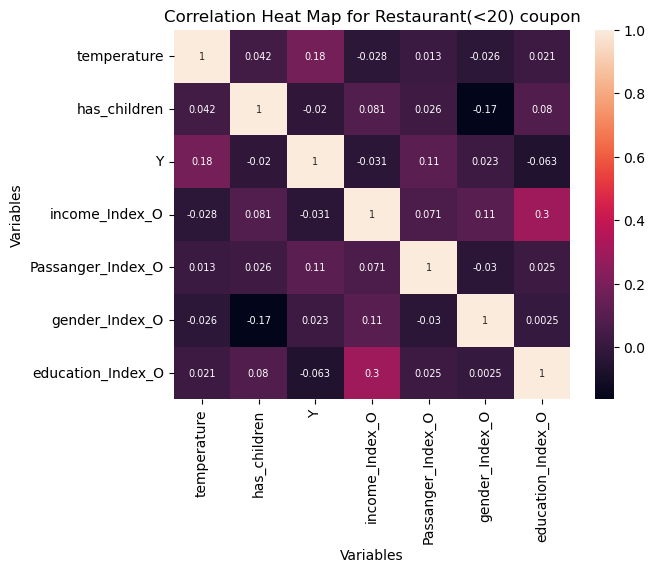

In [205]:
# Statistical correlation for Restaurant <20 coupon
data42 = data40.query('coupon == "Restaurant(<20)"')
corr_matrix = data42.corr(numeric_only=True)
fig40b = sns.heatmap(corr_matrix, annot=True , annot_kws={"fontsize": 7})
plt.title("Correlation Heat Map for Restaurant(<20) coupon")
plt.xlabel("Variables")
plt.ylabel("Variables")
fig40b

The heatmap indicates that there is no noticeable correlation among the selected variables for Restaurant <20 coupons.

<Axes: title={'center': 'Correlation Heat Map for Carry out & Take away coupon'}, xlabel='Variables', ylabel='Variables'>

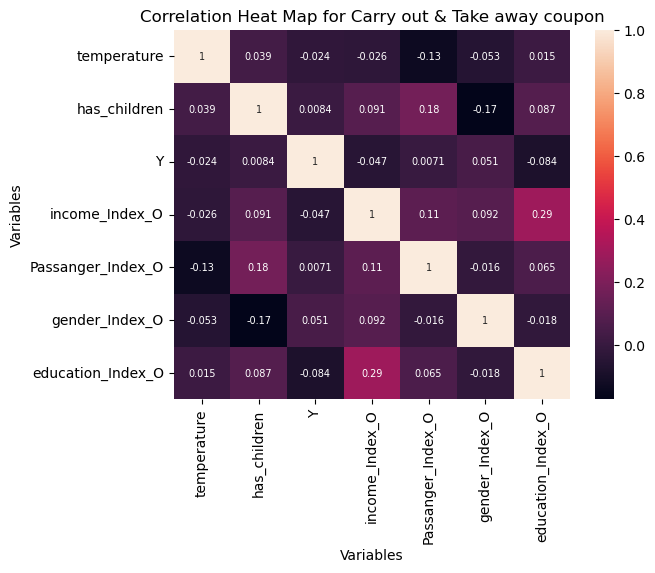

In [206]:
# Statistical correlation for Carry out & Take away coupon
data43 = data40.query('coupon == "Carry out & Take away"')
corr_matrix = data43.corr(numeric_only=True)
fig40c = sns.heatmap(corr_matrix, annot=True , annot_kws={"fontsize": 7})
plt.title("Correlation Heat Map for Carry out & Take away coupon")
plt.xlabel("Variables")
plt.ylabel("Variables")
fig40c

The heatmap indicates that there is no noticeable correlation among the selected variables for Carry out & Take away coupons.

<Axes: title={'center': 'Correlation Heat Map for Restaurant(20-50) coupon'}, xlabel='Variables', ylabel='Variables'>

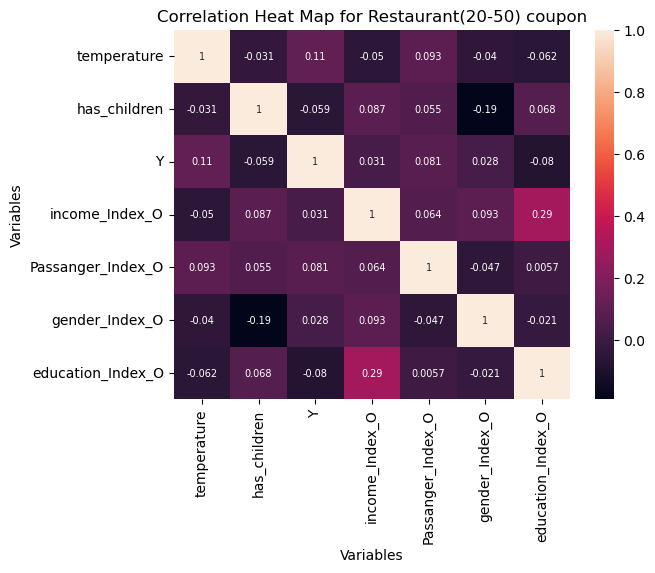

In [207]:
# Statistical correlation for Restaurant (20-50) coupon
data44 = data40.query('coupon == "Restaurant(20-50)"')
corr_matrix = data44.corr(numeric_only=True)
fig40d = sns.heatmap(corr_matrix, annot=True , annot_kws={"fontsize": 7})
plt.title("Correlation Heat Map for Restaurant(20-50) coupon")
plt.xlabel("Variables")
plt.ylabel("Variables")
fig40d

In [ ]:
The heatmap indicates that there is no noticeable correlation among the selected variables for Restaurant (20-50) coupons.

<Axes: title={'center': 'Correlation Heat Map for Coffe House coupon'}, xlabel='Variables', ylabel='Variables'>

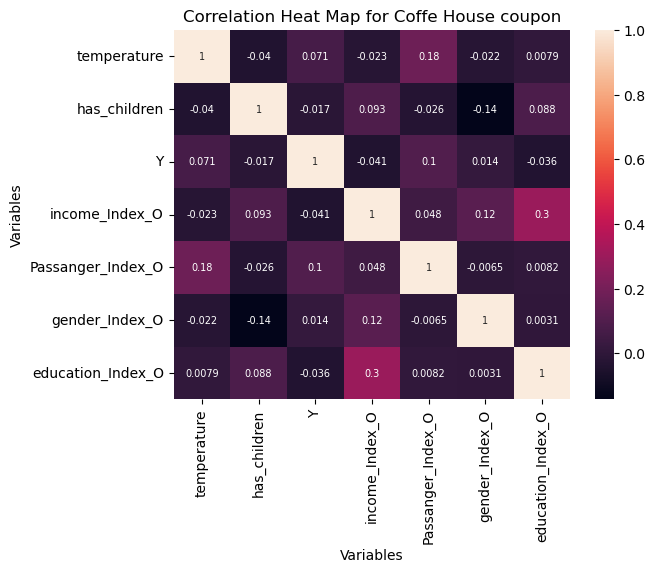

In [208]:
# Statistical correlation for Coffee House coupon
data45 = data40.query('coupon == "Coffee House"')
corr_matrix = data45.corr(numeric_only=True)
fig40e = sns.heatmap(corr_matrix, annot=True , annot_kws={"fontsize": 7})
plt.title("Correlation Heat Map for Coffe House coupon")
plt.xlabel("Variables")
plt.ylabel("Variables")
fig40e

In [ ]:
The heatmap indicates that there is no noticeable correlation among the selected variables for coffee house coupons.

<Axes: title={'center': 'Correlation Heat Map for All coupon'}, xlabel='Variables', ylabel='Variables'>

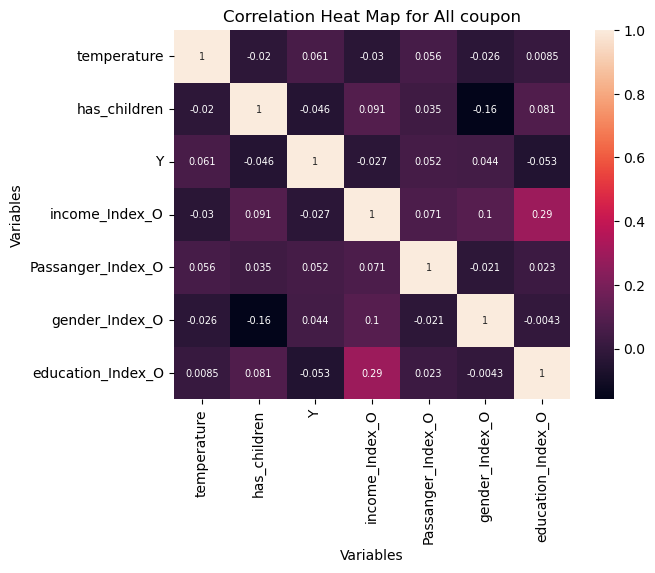

In [209]:
## Statistical correlation for all coupon
corr_matrix = data40.corr(numeric_only=True)
fig40e = sns.heatmap(corr_matrix, annot=True , annot_kws={"fontsize": 7})
plt.title("Correlation Heat Map for All coupon")
plt.xlabel("Variables")
plt.ylabel("Variables")
fig40e

The heatmap indicates that there is no noticeable correlation among the selected variables for all coupons.

In [34]:
#build a table with the acceptance proportion by coupon

Total_Observation_Coupon = data.groupby("coupon")[["Y"]].agg('count')
Total_Accepted_Coupon = data.groupby("coupon")[["Y"]].agg(sum)
print('Total_Observation_Coupon' , Total_Observation_Coupon)
print('Total_Accepted_Coupon', Total_Accepted_Coupon)
Rate_by_coupon = Total_Accepted_Coupon / Total_Observation_Coupon
Rate_by_coupon_df = Rate_by_coupon.reset_index()

Total_Observation_Coupon                           Y
coupon                     
Bar                    2017
Carry out & Take away  2393
Coffee House           3996
Restaurant(20-50)      1492
Restaurant(<20)        2786
Total_Accepted_Coupon                           Y
coupon                     
Bar                     827
Carry out & Take away  1760
Coffee House           1995
Restaurant(20-50)       658
Restaurant(<20)        1970


In [250]:
# acceptance rate by coupon
fig5c =px.line(Rate_by_coupon_df,x= "coupon", y = "Y")
fig5c.update_layout(title="Line Chart accepted coupon rate by coupon type")
fig5c.update_layout(yaxis_title="proportion of accept the coupon")
fig5c.show()

Rephrase "Based on the results presented in Figure 5c, the acceptance proportions by coupon type can be observed. Among the different coupon types, Carry out & Take away and Restaurant (<20) exhibit higher acceptance rates with 73% and 71% respectively, while Coffee House acceptance rate of 50% whereas Restaurant (20-50) and Bar demonstrates the lower acceptance rate with 44% and 41% respectevly."

In [249]:
# removing null values from table using the visiting columns 
data50 = data.dropna(subset=['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'])
data50

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,income_Index_O,Passanger_Index_O,gender_Index_O,education_Index_O
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,1,0,0,0,1,1,5,0,1,4
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,1,0,0,0,1,0,5,1,1,4
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,1,0,0,0,1,1,5,1,1,4
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,1,1,0,0,1,0,5,1,1,4
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,1,0,0,0,1,0,5,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,1,0,0,1,0,1,6,3,1,4
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,1,0,0,0,1,1,6,0,1,4
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,1,0,0,1,0,0,6,0,1,4
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,1,1,1,0,1,0,6,0,1,4


In [236]:
data51 = data50.query('coupon == "Carry out & Take away"')
#build a table with the acceptance proportion by Carry out & Take away
Total_Observation_CarryAway_Coupon = data51.groupby('CarryAway')[["Y"]].agg('count')
Total_Accepted_CarryAway_Coupon = data51.groupby('CarryAway')[["Y"]].agg(sum)
print('Total_Observation_Coupon CarryAway=' , Total_Observation_CarryAway_Coupon)
print('Total_Accepted_Coupon CarryAway=', Total_Accepted_CarryAway_Coupon)
Rate_by_CarryAway_coupon = Total_Accepted_CarryAway_Coupon / Total_Observation_CarryAway_Coupon
Rate_by_CarryAway_coupon_df = Rate_by_CarryAway_coupon.reset_index()

Total_Observation_Coupon CarryAway=              Y
CarryAway     
1~3        830
4~8        783
gt8        296
less1      343
never       28
Total_Accepted_Coupon CarryAway=              Y
CarryAway     
1~3        614
4~8        590
gt8        223
less1      233
never       22


In [301]:
# acceptance rate by CarryAway
fig50b =px.line(Rate_by_CarryAway_coupon_df,x= "CarryAway", y = "Y")
fig50b.update_layout(title="Line Chart coupon accepted rate CarryAway by frequency")
fig50b.update_layout(yaxis_title="proportion of accept the coupon")
fig50b.update_layout(xaxis_title="frequency")
fig50b.show()

The acceptance rate of the carry-away coupon is higher across all categories of visits. Particularly, individuals who have never used the carry-away option exhibit the highest proportion of acceptance for this coupon.

In [238]:
data52 = data50.query('coupon == "Restaurant(<20)"')
#build a table with the acceptance proportion by RestaurantLessThan20 visits
Total_Observation_RestaurantLessThan20_Coupon = data52.groupby('RestaurantLessThan20')[["Y"]].agg('count')
Total_Accepted_RestaurantLessThan20_Coupon = data52.groupby('RestaurantLessThan20')[["Y"]].agg(sum)
print('Total_Observation_Coupon RestaurantLessThan20=' , Total_Observation_RestaurantLessThan20_Coupon)
print('Total_Accepted_Coupon RestaurantLessThan20=', Total_Accepted_RestaurantLessThan20_Coupon)
Rate_by_RestaurantLessThan20_coupon = Total_Accepted_RestaurantLessThan20_Coupon / Total_Observation_RestaurantLessThan20_Coupon
Rate_by_RestaurantLessThan20_coupon_df = Rate_by_RestaurantLessThan20_coupon.reset_index()

Total_Observation_Coupon RestaurantLessThan20=                          Y
RestaurantLessThan20      
1~3                   1107
4~8                    773
gt8                    288
less1                  442
never                   43
Total_Accepted_Coupon RestaurantLessThan20=                         Y
RestaurantLessThan20     
1~3                   780
4~8                   556
gt8                   219
less1                 299
never                  27


In [303]:
# acceptance rate by coupon
fig50c =px.line(Rate_by_RestaurantLessThan20_coupon_df,x= "RestaurantLessThan20", y = "Y")
fig50c.update_layout(title="Line Chart coupon accepted rate RestaurantLessThan20 by visits")
fig50c.update_layout(yaxis_title="proportion of accept the coupon")
fig50c.update_layout(xaxis_title="visits")
fig50c.show()

Regarding restaurants with prices less than 20 dollars, the coupon acceptance rate exhibits an increasing pattern as the frequency of visits rises. Among individuals who visit these restaurants more than 8 times, the acceptance rate reaches its peak at 76%. Moreover, individuals with infrequent visits (less than one or never) consistently display a high acceptance rate, with the lowest coupon acceptance rate standing at 63%.

In [240]:
data53 = data50.query('coupon == "Restaurant(20-50)"')
#build a table with the acceptance proportion by Restaurant(20-50 visits
Total_Observation_Restaurant20To50_Coupon = data52.groupby('Restaurant20To50')[["Y"]].agg('count')
Total_Accepted_Restaurant20To50_Coupon = data52.groupby('Restaurant20To50')[["Y"]].agg(sum)
print('Total_Observation_Coupon Restaurant20To50=' , Total_Observation_Restaurant20To50_Coupon)
print('Total_Accepted_Coupon Restaurant20To50=', Total_Accepted_Restaurant20To50_Coupon)
Rate_by_Restaurant20To50_coupon = Total_Accepted_Restaurant20To50_Coupon / Total_Observation_Restaurant20To50_Coupon

Rate_by_Restaurant20To50_coupon_df = Rate_by_Restaurant20To50_coupon.reset_index()

Total_Observation_Coupon Restaurant20To50=                      Y
Restaurant20To50      
1~3                685
4~8                166
gt8                 59
less1             1284
never              459
Total_Accepted_Coupon Restaurant20To50=                     Y
Restaurant20To50     
1~3               517
4~8               116
gt8                41
less1             891
never             316


In [302]:
# acceptance rate by coupon
fig50d =px.line(Rate_by_Restaurant20To50_coupon_df ,x= "Restaurant20To50", y = "Y")
fig50d.update_layout(title="Line Chart coupon accepted rate Restaurant20To50 by visits")
fig50d.update_layout(yaxis_title="proportion of accept the coupon")
fig50d.update_layout(xaxis_title="visits")
fig50d.show()

When it comes to restaurants with prices ranging from 20 to 50 dollars, the coupon acceptance rate demonstrates an upward trend as the frequency of visits increases. Among individuals who visit these restaurants between 4 and 8 times, the acceptance rate is at its peak, reaching 72%. Conversely, individuals with infrequent visits (less than one or never) show a considerably lower acceptance rate, dropping below 33%. Notably, those who have never visited these restaurants display the lowest coupon acceptance rate, standing at 23%.

In [269]:
data54 = data50.query('coupon == "Restaurant(20-50)" and income_Index_O < 2')
#build a table with the acceptance proportion by Restaurant(20-50) Low income individuals Less than 25K
Total_Observation_Restaurant20To50_Coupon = data54.groupby('Restaurant20To50')[["Y"]].agg('count')
Total_Accepted_Restaurant20To50_Coupon = data54.groupby('Restaurant20To50')[["Y"]].agg(sum)
print('Total_Observation_Coupon Restaurant20To50=' , Total_Observation_Restaurant20To50_Coupon)
print('Total_Accepted_Coupon Restaurant20To50=', Total_Accepted_Restaurant20To50_Coupon)
Rate_by_Restaurant20To50_LI_coupon = Total_Accepted_Restaurant20To50_Coupon / Total_Observation_Restaurant20To50_Coupon

Rate_by_Restaurant20To50_LI_coupon_df = Rate_by_Restaurant20To50_LI_coupon.reset_index()

Total_Observation_Coupon Restaurant20To50=                     Y
Restaurant20To50     
1~3                45
4~8                25
gt8                 9
less1             155
never              81
Total_Accepted_Coupon Restaurant20To50=                    Y
Restaurant20To50    
1~3               22
4~8               18
gt8                5
less1             52
never             19


In [304]:
fig51a =px.line(Rate_by_Restaurant20To50_LI_coupon_df ,x= "Restaurant20To50", y = "Y")
fig51a.update_layout(title="Line Chart coupon accepted rate Restaurant20To50 by visits for Low income individuals Less than 25K")
fig51a.update_layout(yaxis_title="proportion of accept the coupon")
fig51a.update_layout(xaxis_title="visits")
fig51a.show()

Low-income individuals who have never visited or have visited fewer than 1 time on restaurant with prices between 20 to 50 dollars demonstrate the lowest coupon acceptance rate, below 33%. However, low-income individuals who have visited such restaurants 4 to 8 times exhibit a significantly higher coupon acceptance rate, surpassing 70%.

In [308]:
data55 = data50.query('coupon == "Restaurant(20-50)" and income_Index_O > 1')
#build a table with the acceptance proportion by Restaurant(20-50) high income individuals more than 25K
Total_Observation_Restaurant20To50_Coupon = data55.groupby('Restaurant20To50')[["Y"]].agg('count')
Total_Accepted_Restaurant20To50_Coupon = data55.groupby('Restaurant20To50')[["Y"]].agg(sum)
print('Total_Observation_Coupon Restaurant20To50=' , Total_Observation_Restaurant20To50_Coupon)
print('Total_Accepted_Coupon Restaurant20To50=', Total_Accepted_Restaurant20To50_Coupon)
Rate_by_Restaurant20To50_HI_coupon = Total_Accepted_Restaurant20To50_Coupon / Total_Observation_Restaurant20To50_Coupon

Rate_by_Restaurant20To50_HI_coupon_df = Rate_by_Restaurant20To50_HI_coupon.reset_index()

Total_Observation_Coupon Restaurant20To50=                     Y
Restaurant20To50     
1~3               326
4~8                59
gt8                23
less1             554
never             140
Total_Accepted_Coupon Restaurant20To50=                     Y
Restaurant20To50     
1~3               174
4~8                35
gt8                17
less1             243
never              47


In [309]:
fig51b =px.line(Rate_by_Restaurant20To50_HI_coupon_df, x= "Restaurant20To50", y = "Y")
fig51b.update_layout(title="Line Chart coupon accepted rate Restaurant20To50 by visits for high income individuals more than 25K")
fig51b.update_layout(yaxis_title="proportion of accept the coupon")
fig51b.update_layout(xaxis_title="visits")
fig51b.show()

For high-income individuals visiting restaurants with prices between 20 to 50 dollars, the coupon acceptance rate increases as the frequency of visits increases. Individuals who visit these restaurants more than 8 times exhibit the highest acceptance rate, reaching 73%. On the other hand, for those with low visit frequencies (less than one or never), the acceptance rate is below 45%, with the lowest coupon acceptance observed among individuals who have never visited those restaurants, standing at 33%.

In [294]:
data56 = data50.query('coupon == "Restaurant(<20)" and income_Index_O < 2')
#build a table with the acceptance proportion by  Restaurant(20-50) Low income individuals Less than 25K
Total_Observation_RestaurantLessThan20_Coupon = data56.groupby('RestaurantLessThan20')[["Y"]].agg('count')
Total_Accepted_RestaurantLessThan20_Coupon = data56.groupby('RestaurantLessThan20')[["Y"]].agg(sum)
print('Total_Observation_Coupon RestaurantLessThan20=' , Total_Observation_RestaurantLessThan20_Coupon)
print('Total_Accepted_Coupon RestaurantLessThan20=', Total_Accepted_RestaurantLessThan20_Coupon)
Rate_by_RestaurantLessThan20_LI_coupon = Total_Accepted_RestaurantLessThan20_Coupon / Total_Observation_RestaurantLessThan20_Coupon

Rate_by_RestaurantLessThan20_LI_coupon_df = Rate_by_RestaurantLessThan20_LI_coupon.reset_index()

Total_Observation_Coupon RestaurantLessThan20=                         Y
RestaurantLessThan20     
1~3                   243
4~8                   166
gt8                    65
less1                 126
never                   5
Total_Accepted_Coupon RestaurantLessThan20=                         Y
RestaurantLessThan20     
1~3                   170
4~8                   113
gt8                    46
less1                  89
never                   2


In [306]:
fig51c =px.line(Rate_by_RestaurantLessThan20_LI_coupon_df, x= "RestaurantLessThan20", y = "Y")
fig51c.update_layout(title="Line Chart accepted rate RestaurantLessThan20 by visit - Low Income individuals")
fig51c.update_layout(yaxis_title="proportion of accept the coupon")
fig51c.update_layout(xaxis_title="visits")
fig51c.show()

Low-income individuals who have never visited restaurants with prices below 20 dollars exhibit the lowest coupon acceptance rate, at approximately 40%. However, low-income individuals who have visited such restaurants show a consistently higher coupon acceptance rate, exceeding 68%.

In [296]:
data57 = data50.query('coupon == "Restaurant(<20)" and income_Index_O > 1')
#build a table with the acceptance proportion by Restaurant(20-50) high income individuals more than 25K
Total_Observation_RestaurantLessThan20_Coupon = data57.groupby('RestaurantLessThan20')[["Y"]].agg('count')
Total_Accepted_RestaurantLessThan20_Coupon = data57.groupby('RestaurantLessThan20')[["Y"]].agg(sum)
print('Total_Observation_Coupon RestaurantLessThan20=' , Total_Observation_RestaurantLessThan20_Coupon)
print('Total_Accepted_Coupon RestaurantLessThan20=', Total_Accepted_RestaurantLessThan20_Coupon)
Rate_by_RestaurantLessThan20_HI_coupon = Total_Accepted_RestaurantLessThan20_Coupon / Total_Observation_RestaurantLessThan20_Coupon

Rate_by_RestaurantLessThan20_HI_coupon_df = Rate_by_RestaurantLessThan20_HI_coupon.reset_index()

Total_Observation_Coupon RestaurantLessThan20=                         Y
RestaurantLessThan20     
1~3                   864
4~8                   607
gt8                   223
less1                 316
never                  38
Total_Accepted_Coupon RestaurantLessThan20=                         Y
RestaurantLessThan20     
1~3                   610
4~8                   443
gt8                   173
less1                 210
never                  25


In [307]:
fig51d =px.line(Rate_by_RestaurantLessThan20_HI_coupon_df, x= "RestaurantLessThan20", y = "Y")
fig51d.update_layout(title="Line Chart accepted rate RestaurantLessThan20 by visit - high Income individuals")
fig51d.update_layout(yaxis_title="proportion of accept the coupon")
fig51d.update_layout(xaxis_title="visits")
fig51d.show()

Regardless of the frequency of visits, individuals with higher income demonstrate a higher coupon acceptance rate greather than 65% for the restaurant that costs less than 20 dollars.

In [325]:
data60 = data50.query('income_Index_O < 2 and coupon == "Coffee House"')
#build a table with the acceptance proportion by Restaurant(20-50) Low income individuals Less than 25K
Total_Observation_CoffeeHouse_Coupon = data60.groupby('CoffeeHouse')[["Y"]].agg('count')
Total_Accepted_CoffeeHouse_Coupon = data60.groupby('CoffeeHouse')[["Y"]].agg(sum)
print('Total_Observation_Coupon CoffeeHouse=' , Total_Observation_CoffeeHouse_Coupon)
print('Total_Accepted_Coupon CoffeeHouse=', Total_Accepted_CoffeeHouse_Coupon)
Rate_by_CoffeeHouse_LI_coupon = Total_Accepted_CoffeeHouse_Coupon / Total_Observation_CoffeeHouse_Coupon
Rate_by_CoffeeHouse_LI_coupon_df = Rate_by_CoffeeHouse_LI_coupon.reset_index()


Total_Observation_Coupon CoffeeHouse=                Y
CoffeeHouse     
1~3          223
4~8          152
gt8           82
less1        225
never        181
Total_Accepted_Coupon CoffeeHouse=                Y
CoffeeHouse     
1~3          153
4~8          106
gt8           58
less1        117
never         39


In [326]:
fig51e =px.line(Rate_by_CoffeeHouse_LI_coupon_df ,x= "CoffeeHouse", y = "Y")
fig51e.update_layout(title="Line Chart coupon accepted rate CoffeeHouse by visits for Low income individuals Less than 25K")
fig51e.update_layout(yaxis_title="proportion of accept the coupon")
fig51e.update_layout(xaxis_title="visits")
fig51e.show()

Low-income individuals who have never visited CoffeeHouses exhibit the lowest coupon acceptance rate, at approximately 21%. However, low-income individuals who have visited 1 or more time such CoffeeHouses show a consistently higher coupon acceptance rate, exceeding 68%.

In [327]:
data61 = data50.query('income_Index_O > 1 and coupon == "Coffee House"')
#build a table with the acceptance proportion by Restaurant(20-50) high income individuals more than 25K
Total_Observation_CoffeeHouse_Coupon = data61.groupby('CoffeeHouse')[["Y"]].agg('count')
Total_Accepted_CoffeeHouse_Coupon = data61.groupby('CoffeeHouse')[["Y"]].agg(sum)
print('Total_Observation_Coupon CoffeeHouse=' , Total_Observation_CoffeeHouse_Coupon)
print('Total_Accepted_Coupon CoffeeHouse=', Total_Accepted_CoffeeHouse_Coupon)

Rate_by_CoffeeHouse_HI_coupon = Total_Accepted_CoffeeHouse_Coupon / Total_Observation_CoffeeHouse_Coupon

Rate_by_CoffeeHouse_HI_coupon_df = Rate_by_CoffeeHouse_HI_coupon.reset_index()

Total_Observation_Coupon CoffeeHouse=                Y
CoffeeHouse     
1~3          796
4~8          355
gt8          260
less1        827
never        715
Total_Accepted_Coupon CoffeeHouse=                Y
CoffeeHouse     
1~3          507
4~8          240
gt8          167
less1        389
never        118


In [324]:
fig51f =px.line(Rate_by_CoffeeHouse_HI_coupon_df ,x= "CoffeeHouse", y = "Y")
fig51f.update_layout(title="Line Chart coupon accepted rate CoffeeHouse by visits for high income individuals more than 25K")
fig51f.update_layout(yaxis_title="proportion of accept the coupon")
fig51f.update_layout(xaxis_title="visits")
fig51f.show()

The coupon acceptance rate is lowest, around 16%, among high-income individuals who have never been to CoffeeHouses. On the other hand, high-income individuals who have visited CoffeeHouses multiple times consistently demonstrate a higher coupon acceptance rate, surpassing 63%.

In [317]:
data70 = data50.query('coupon == "Bar" and income_Index_O < 2')
#build a table with the acceptance proportion by Restaurant(20-50) Low income individuals Less than 25K
Total_Observation_Bar_Coupon = data70.groupby('Bar')[["Y"]].agg('count')
Total_Accepted_Bar_Coupon = data70.groupby('Bar')[["Y"]].agg(sum)
print('Total_Observation_Coupon Bar =' , Total_Observation_Bar_Coupon)
print('Total_Accepted_Coupon Bar =', Total_Accepted_Bar_Coupon)
Rate_by_Bar_LI_coupon = Total_Accepted_Bar_Coupon / Total_Observation_Bar_Coupon
Rate_by_Bar_LI_coupon_df = Rate_by_Bar_LI_coupon.reset_index()

Total_Observation_Coupon Bar =          Y
Bar       
1~3     88
4~8     43
gt8      9
less1   98
never  192
Total_Accepted_Coupon Bar =         Y
Bar      
1~3    58
4~8    34
gt8     5
less1  47
never  43


In [318]:
fig51k =px.line(Rate_by_Bar_LI_coupon_df ,x= "Bar", y = "Y")
fig51k.update_layout(title="Line Chart coupon accepted rate Bar by visits for Low income individuals less than 25K")
fig51k.update_layout(yaxis_title="proportion of accept the coupon")
fig51k.update_layout(xaxis_title="visits")
fig51k.show()

The coupon acceptance rate is lowest, around 22%, among low-income individuals who have never been to Bar. On the other hand, low-income individuals who have visited a bar 4 to 8 times consistently demonstrate a higher coupon acceptance rate, surpassing 79%.

In [319]:
data71 = data50.query('coupon == "Bar" and income_Index_O > 1')
#build a table with the acceptance proportion by Restaurant(20-50) high income individuals more than 25K
Total_Observation_Bar_Coupon = data71.groupby('Bar')[["Y"]].agg('count')
Total_Accepted_Bar_Coupon = data71.groupby('Bar')[["Y"]].agg(sum)
print('Total_Observation_Coupon Bar =' , Total_Observation_Bar_Coupon)
print('Total_Accepted_Coupon Bar =', Total_Accepted_Bar_Coupon)
Rate_by_Bar_HI_coupon = Total_Accepted_Bar_Coupon / Total_Observation_Bar_Coupon
Rate_by_Bar_HI_coupon_df = Rate_by_Bar_HI_coupon.reset_index()

Total_Observation_Coupon Bar =          Y
Bar       
1~3    291
4~8    104
gt8     37
less1  455
never  596
Total_Accepted_Coupon Bar =          Y
Bar       
1~3    187
4~8     80
gt8     28
less1  200
never  106


In [320]:
fig51l =px.line(Rate_by_Bar_HI_coupon_df ,x= "Bar", y = "Y")
fig51l.update_layout(title="Line Chart coupon accepted rate Bar by visits for high income individuals more than 25K")
fig51l.update_layout(yaxis_title="proportion of accept the coupon")
fig51l.update_layout(xaxis_title="visits")
fig51l.show()

The coupon acceptance rate is lowest, around 17%, among high-income individuals who have never been to Bar. On the other hand, high-income individuals who have visited a bar 4 to 8 times consistently demonstrate a higher coupon acceptance rate, surpassing 76%.

Executive Summary 
The problem was to identify the factors affecting the coupon acceptance rate

Analysis of customers who accepted and rejected the coupons revealed the following insights. Out of the total 12,684 observations, the overall coupon acceptance rate is 56.8%. However, acceptance rates differ based on the coupon type. Carry out & Take away and Restaurant (<20) coupons have higher acceptance rates, reaching 73% and 71% respectively. Coffee House coupons have a 50% acceptance rate, while Restaurant (20-50) and Bar coupons show lower rates at 44% and 41% respectively.

The acceptance rate for Carry out & Take away coupons is consistently higher across all visit categories. Particularly, individuals who have never utilized the carry-out option demonstrate the highest proportion of acceptance for this coupon.

The analysis categorized individuals into two income groups: Low income (<25K) and High income (>=25K).

For coupons targeting restaurants with prices below 20 dollars, low-income individuals who have never visited these restaurants exhibit the lowest coupon acceptance rate, around 40%. However, low-income individuals who have visited such restaurants consistently show a higher acceptance rate, exceeding 68%. For these restaurants, high-income individuals demonstrate a higher acceptance rate of over 65% regardless of visit frequency.

Regarding coupons for restaurants with prices between 20 and 50 dollars, low-income individuals who have never visited or have visited fewer than 1 time display the lowest acceptance rate, below 33%. However, low-income individuals who have visited these restaurants 4 to 8 times exhibit a significantly higher acceptance rate, surpassing 70%. Among high-income individuals, the acceptance rate shows an increasing trend with visit frequency. Those who visit these restaurants more than 8 times demonstrate the highest acceptance rate, reaching 73%. Conversely, for individuals with low visit frequencies (less than one or never), the acceptance rate falls below 45%. The lowest acceptance rate is observed among individuals who have never visited those restaurants, standing at 33%.

For Coffee House coupons, low-income individuals who have never visited CoffeeHouses display the lowest acceptance rate, approximately 21%. However, low-income individuals who have visited these establishments 1 or more times consistently exhibit a higher acceptance rate, exceeding 68%. High-income individuals who have never visited CoffeeHouses also show a low acceptance rate, approximately 16%. However, low-income individuals who have visited CoffeeHouses multiple times consistently demonstrate a higher acceptance rate, surpassing 63%.

Regarding coupons for bars, low-income individuals who have never been to a bar exhibit the lowest acceptance rate, around 22%. Conversely, low-income individuals who have visited a bar 4 to 8 times consistently show a higher acceptance rate, exceeding 79%. Similarly, among high-income individuals who have never visited a bar, the acceptance rate reaches its lowest point, around 17%. However, high-income individuals who have visited a bar 4 to 8 times consistently display a higher acceptance rate, surpassing 76%.

After considering all these observations, it becomes evident that the most influential factor in determining coupon acceptance is the customer's previous visits to the specific location where the coupon can be utilized. Generally, the lower the frequency of the customer's visits, the less likely they are to accept the coupon. This trend holds true for all coupon categories except Carry out & Take away, which maintains a consistent acceptance rate across visit frequencies.

As a recommendation, if the goal is to increase the coupon acceptance rate, it is advisable to target individuals who have previously visited the establishments where the coupon will be used. This approach maximizes the chances of coupon acceptance. However, it is important to note that offering coupons to individuals who have never visited before can also generate new business, as the coupon becomes an incentive for their initial visit.